In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn import cross_validation

In [2]:
'''
#read serie A data
df_cal   = pd.read_csv("../data/serieA_1516.csv")
df_cal_2 = pd.read_csv("../data/serieA_1415.csv")
df_cal_3 = pd.read_csv("../data/serieA_1314.csv")
df_cal_4 = pd.read_csv("../data/serieA_1213.csv")
df_cal_5 = pd.read_csv("../data/serieA_1112.csv")
'''
#read EPL data
#df_cal   = pd.read_csv("../data/EPL-1516.csv")
df_cal_2 = pd.read_csv("../data/EPL-1415.csv")
df_cal_3 = pd.read_csv("../data/EPL-1314.csv")
df_cal_4 = pd.read_csv("../data/EPL-1213.csv")
df_cal_5 = pd.read_csv("../data/EPL-1112.csv")

df_cal_2.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2,1,H,1,1,D,...,2.10,24,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2,2,D,1,2,A,...,1.80,22,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1,2,A,0,1,A,...,2.13,25,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0,1,A,0,0,D,...,1.58,24,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0,1,A,0,0,D,...,1.60,23,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51
5,E0,16/08/14,West Brom,Sunderland,2,2,D,1,1,D,...,1.70,22,-0.25,1.94,1.91,2.02,1.97,2.09,3.42,4.03
6,E0,16/08/14,West Ham,Tottenham,0,1,A,0,0,D,...,1.82,21,0.50,1.91,1.86,2.10,2.02,3.92,3.67,2.03
7,E0,17/08/14,Liverpool,Southampton,2,1,H,1,0,H,...,2.30,24,-1.50,2.04,2.00,1.94,1.87,1.43,4.83,8.75
8,E0,17/08/14,Newcastle,Man City,0,2,A,0,1,A,...,2.19,24,1.00,1.86,1.80,2.12,2.08,5.55,4.38,1.63
9,E0,18/08/14,Burnley,Chelsea,1,3,A,1,3,A,...,1.94,23,1.50,1.82,1.70,2.35,2.20,9.25,5.01,1.40


In [3]:
def get_teams(df):
    
    teams = []
    
    for i,cal in enumerate(df.iterrows()):
        teams.append(cal[1]["HomeTeam"])
        teams.append(cal[1]["AwayTeam"])

        if i == 9: 
            return teams


In [5]:
#teams_a  = get_teams(df_cal)
teams_a2 = get_teams(df_cal_2)
teams_a3 = get_teams(df_cal_3)
teams_a4 = get_teams(df_cal_4)
teams_a5 = get_teams(df_cal_5)

print teams_a2
print teams_a3
print teams_a4
print teams_a5


['Arsenal', 'Crystal Palace', 'Leicester', 'Everton', 'Man United', 'Swansea', 'QPR', 'Hull', 'Stoke', 'Aston Villa', 'West Brom', 'Sunderland', 'West Ham', 'Tottenham', 'Liverpool', 'Southampton', 'Newcastle', 'Man City', 'Burnley', 'Chelsea']
['Arsenal', 'Aston Villa', 'Liverpool', 'Stoke', 'Norwich', 'Everton', 'Sunderland', 'Fulham', 'Swansea', 'Man United', 'West Brom', 'Southampton', 'West Ham', 'Cardiff', 'Chelsea', 'Hull', 'Crystal Palace', 'Tottenham', 'Man City', 'Newcastle']
['Arsenal', 'Sunderland', 'Fulham', 'Norwich', 'Newcastle', 'Tottenham', 'QPR', 'Swansea', 'Reading', 'Stoke', 'West Brom', 'Liverpool', 'West Ham', 'Aston Villa', 'Man City', 'Southampton', 'Wigan', 'Chelsea', 'Everton', 'Man United']
['Blackburn', 'Wolves', 'Fulham', 'Aston Villa', 'Liverpool', 'Sunderland', 'Newcastle', 'Arsenal', 'QPR', 'Bolton', 'Wigan', 'Norwich', 'Stoke', 'Chelsea', 'West Brom', 'Man United', 'Man City', 'Swansea', 'Arsenal', 'Liverpool']


**Definition of features**

In [6]:
def build_features(df, teams):

    team_features = []
    
    for team in teams:
        #print team_a
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]
        
        #shots made
        team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
        #shots on-target made
        team_st   = team_away["AST"].sum() + team_home["HST"].sum()
        #shots conceded
        team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
        #shots on-target conceded
        team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
        #corners awarded
        team_c    = team_away["AC"].sum()  + team_home["HC"].sum()
        #corners conceded
        team_cc    = team_away["HC"].sum()  + team_home["AC"].sum()

        team_features.append([team_s,team_sc,team_st,team_stc,team_c,team_cc])

    return team_features
    

In [7]:
def build_target(df, teams):

    team_target = []
    
    for team in teams:
        #print team_a
        t      = df[(df['HomeTeam']==team) | (df['AwayTeam']==team)]
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]

        team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
        team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
        team_draw = len(t[t['FTAG']==t['FTHG']])

        team_points = 3*team_a_win + 3*team_h_win + team_draw
        team_target.append(team_points)

    return team_target


In [8]:
feat_test = build_features(df_cal,teams_a)
targ_test = build_target(df_cal,teams_a)

print len(feat_test)
print len(targ_test)

print feat_test
print targ_test

NameError: name 'df_cal' is not defined

In [10]:
#features = build_features(df_cal,teams_a) + build_features(df_cal_2,teams_a2) + build_features(df_cal_3,teams_a3) + build_features(df_cal_4,teams_a4) + build_features(df_cal_5,teams_a5)
features = build_features(df_cal_2,teams_a2) + build_features(df_cal_3,teams_a3) + build_features(df_cal_4,teams_a4) + build_features(df_cal_5,teams_a5)


#target  = build_target(df_cal,teams_a) + build_target(df_cal_2,teams_a2) + build_target(df_cal_3,teams_a3) + build_target(df_cal_4,teams_a4) + build_target(df_cal_5,teams_a5)

target  = build_target(df_cal_2,teams_a2) + build_target(df_cal_3,teams_a3) + build_target(df_cal_4,teams_a4) + build_target(df_cal_5,teams_a5)


df = pd.DataFrame(features, columns=["shots","shots_ontarget","shots_conceded","shots_conceded_ontarget","corners","corners_conceded"])

df["points"] = target

df.to_csv("../data/proc_data_en.csv")

#print features
#print target

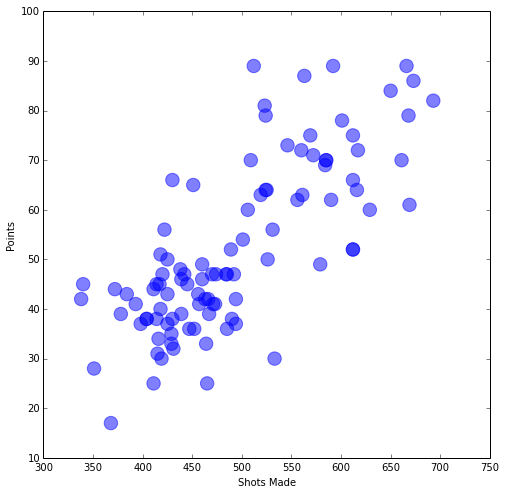

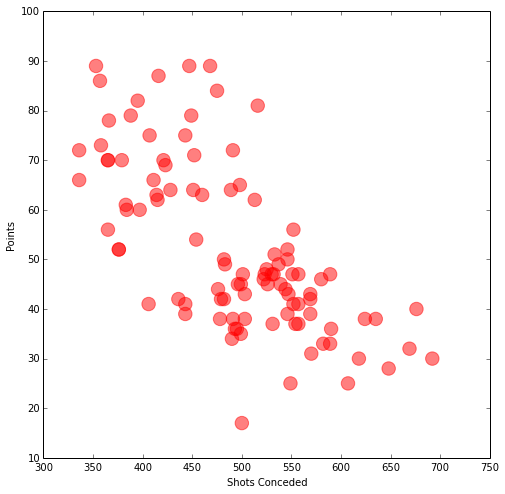

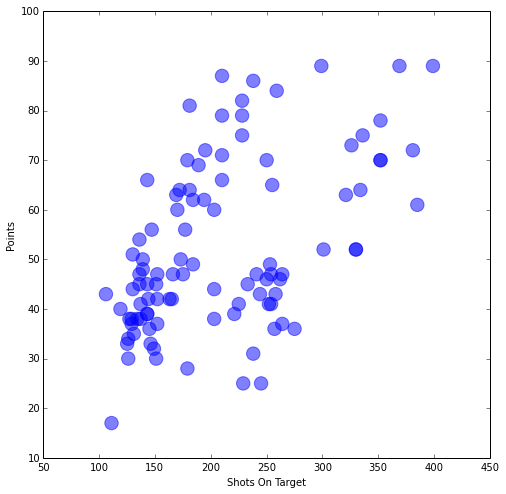

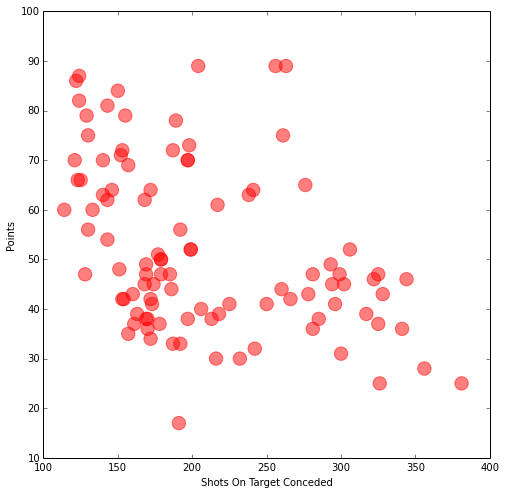

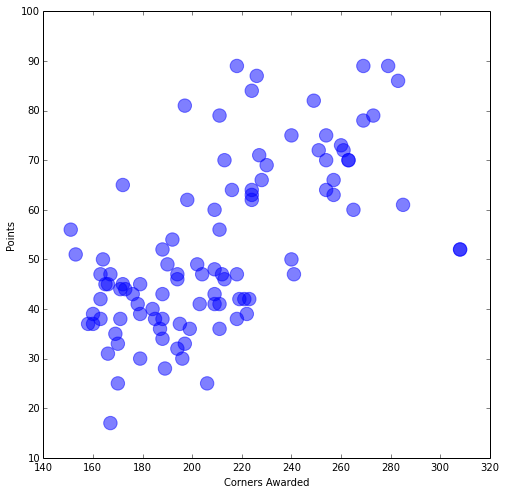

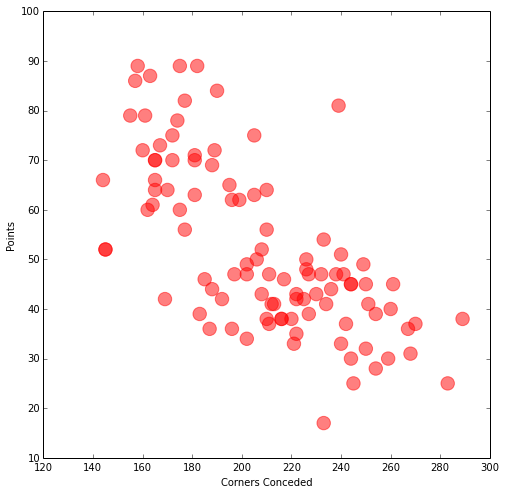

In [10]:
# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,0], target,  color='b',s=180,alpha=0.5)

xlabel('Shots Made')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,1], target,  color='r',s=180,alpha=0.5)

xlabel('Shots Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,2], target,  color='b',s=180,alpha=0.5)

xlabel('Shots On Target')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,3], target,  color='r',s=180,alpha=0.5)

xlabel('Shots On Target Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,4], target,  color='b',s=180,alpha=0.5)

xlabel('Corners Awarded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,5], target,  color='r',s=180,alpha=0.5)

xlabel('Corners Conceded')
ylabel('Points')
